<a href="https://colab.research.google.com/github/LuluTamaturgo/Data-Science/blob/main/Consumo_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de gastos nas compras de mercado -> periodo Dezembro 2022 - Ano 2023


Neste projeto realizamos uma análise exploratória, tendo como base o histórico de compras para mercado dentro de um periodo, sendo Dezembro de 2022 e o ano de 2023.
Abaixo temos dois conjuntos de dados:

*  1️⃣ **Descrição consumo mensal** Coletamos dados que nos apresentam o valor total gasto na compra por mês composta pelas categorias: Valor_Mercado,	Cartao_Alimentacao,	Valor_Pago	e Cartao_Natal.

* 2️⃣ **Descrição consumo mensal por categorias**: Contém informações sobre os gastos obtidos nas compras mensais subdivididos por categorias: Suprimentos,	Higiene,	Carnes_Verduras,	Lanches,	Limpeza,	Cigarro e	Extras

* 3️⃣ **PENDENTE**: .

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#importando os arquivos:

lista_mercado_cm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Projetos/Consumo mercado /lista_mercado_cm.txt')
lista_mercado_categoria = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Projetos/Consumo mercado /lista_mercado_categoria.txt')

### 1.1 Descrição : Gasto mensal mercado - periodo: Dezembro 2022 e Ano 2023

In [8]:
lista_mercado_cm

,Ano,Mes,Valor_Mercado,Cartao_Alimentacao,Valor_Pago,Cartao_Natal
0,2022,Dezembro,568.34,100.00,468.34,0.00
1,2023,Janeiro,479.20,150.00,329.20,150.00
2,2023,Feveiro,482.61,139.48,343.13,0.00
3,2023,Março,572.21,100.00,472.21,0.00
4,2023,Abril,0.00,0.00,0.00,0.00
5,2023,Maio,0.00,0.00,0.00,0.00
6,2023,Junho,0.00,0.00,0.00,0.00
7,2023,Julho,0.00,0.00,0.00,0.00
8,2023,Agosto,603.66,0.00,603.66,0.00
9,2023,Setembro,466.97,267.00,200.00,0.00


### 2.1 - Descrição : Gastos mensal por categoria: Dezembro 2022 - Ano 2023:

In [9]:
lista_mercado_categoria

,Meses,Suprimentos,Higiene,Carnes_Verduras,Lanches,Limpeza,Cigarro,Extras
0,Janeiro,93.17,87.93,161.08,40.57,23.87,0.0,72.58
1,Fevereiro,84.42,71.42,161.09,31.38,25.39,0.0,108.91
2,Março,83.23,63.32,219.07,54.53,21.69,0.0,130.38
3,Abril,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4,Maio,0.00,0.00,0.00,0.00,0.00,0.0,0.00
5,Junho,0.00,0.00,0.00,0.00,0.00,0.0,0.00
6,Julho,0.00,0.00,0.00,0.00,0.00,0.0,0.00
7,Agosto,82.10,105.25,125.82,74.36,14.43,0.0,136.72
8,Setembro,101.65,57.90,113.84,34.77,31.74,0.0,107.37
9,Outubro,94.52,67.30,86.00,18.57,33.97,50.0,100.62


## Custo total por Ano: 2022 (Dezembro) - Ano 2023:

In [10]:
print('Total consumo por Ano: ')
lista_mercado_cm.groupby('Ano')['Valor_Pago'].sum().reset_index()

Total consumo por Ano: 


,Ano,Valor_Pago
0,2022,468.34
1,2023,3162.62


## Descrição : Valor cartão beneficio

Saldos recebidos nos cartões beneficios: Alimentação e Natal

In [11]:
cartao_beneficio_dict = {'Ano':lista_mercado_cm['Ano'], 'Mes': lista_mercado_cm['Mes'], 'Cartao_Alimentacao': lista_mercado_cm['Cartao_Alimentacao'], 'Cartao_Natal': lista_mercado_cm['Cartao_Natal']}
df_cartao_beneficio = pd.DataFrame(cartao_beneficio_dict)
df_cartao_beneficio.query('Ano == 2023')

,Ano,Mes,Cartao_Alimentacao,Cartao_Natal
1,2023,Janeiro,150.00,150.00
2,2023,Feveiro,139.48,0.00
3,2023,Março,100.00,0.00
4,2023,Abril,0.00,0.00
5,2023,Maio,0.00,0.00
6,2023,Junho,0.00,0.00
7,2023,Julho,0.00,0.00
8,2023,Agosto,0.00,0.00
9,2023,Setembro,267.00,0.00
10,2023,Outubro,120.73,0.00


## Descrição: Custo mensal

In [12]:
lista_mercado_cm_2023 = lista_mercado_cm.query('Ano == 2023')
consumo_mensal = lista_mercado_cm_2023.groupby('Mes')['Valor_Pago'].value_counts().reset_index()
df_consumo_mensal  = pd.DataFrame(consumo_mensal)

df_consumo_mensal

,Mes,Valor_Pago,count
0,Abril,0.00,1
1,Agosto,603.66,1
2,Dezembro,467.92,1
3,Feveiro,343.13,1
4,Janeiro,329.20,1
5,Julho,0.00,1
6,Junho,0.00,1
7,Maio,0.00,1
8,Março,472.21,1
9,Novembro,467.92,1


<ipython-input-17-dc381c3e999c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




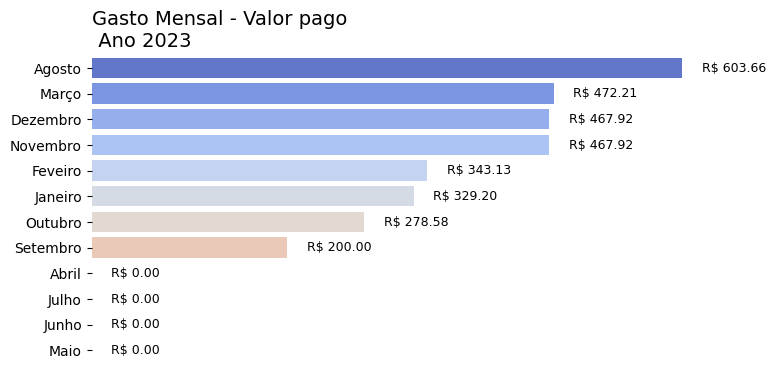

In [17]:
df_custo_mensal_ordenado = df_consumo_mensal.sort_values(by='Valor_Pago',ascending=False)
df_custo_mensal_ordenado

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data= df_custo_mensal_ordenado, x = 'Valor_Pago', y = df_custo_mensal_ordenado['Mes'], orient='h', palette='coolwarm')
ax.set_title('Gasto Mensal - Valor pago \n Ano 2023', fontsize = 14, loc = 'left')
ax.set_ylabel('')

for i, v in enumerate(df_custo_mensal_ordenado['Valor_Pago']):
  ax.text(v+20, i, f"R$ {v:.2f}", color='black', fontsize=9, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)

plt.show()

## Custo total por categoria: Ano 2023

In [14]:
categorias = ['Suprimentos','Higiene','Carnes_Verduras','Lanches','Limpeza','Cigarro','Extras']
total_categoria = lista_mercado_categoria[categorias].sum()
df_total_categoria = pd.DataFrame(total_categoria)
df_total_categoria.columns = ['Total']
df_total_categoria


,Total
Suprimentos,769.57
Higiene,556.07
Carnes_Verduras,951.69
Lanches,358.17
Limpeza,214.37
Cigarro,150.00
Extras,1081.98


<ipython-input-15-7fbcef97db76>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_total_categoria_ordenado, x = 'Total', y = df_total_categoria_ordenado.index, orient='h', palette='coolwarm')


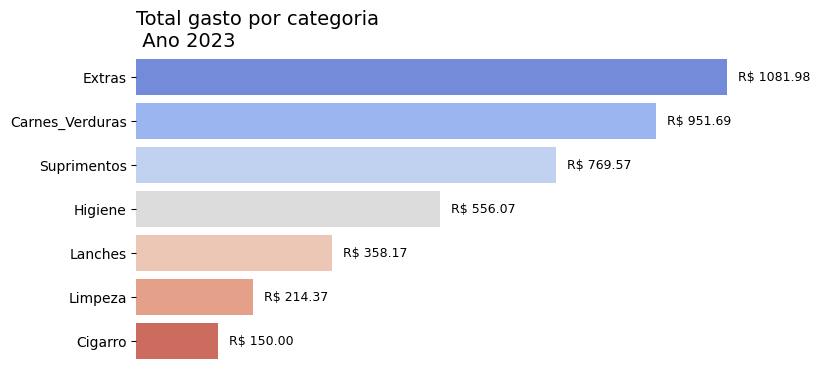

In [15]:
df_total_categoria_ordenado = df_total_categoria.sort_values(by='Total',ascending=False)
df_total_categoria_ordenado

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data= df_total_categoria_ordenado, x = 'Total', y = df_total_categoria_ordenado.index, orient='h', palette='coolwarm')
ax.set_title('Total gasto por categoria \n Ano 2023', fontsize = 14, loc = 'left')
ax.set_ylabel('')

for i, v in enumerate(df_total_categoria_ordenado['Total']):
  ax.text(v+20, i, f"R$ {v:.2f}", color='black', fontsize=9, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)

plt.show()

## Gráfico Interativo - Consumo mensal por categoria

In [18]:
fig = px.line(lista_mercado_categoria, x = 'Meses', y = lista_mercado_categoria.columns, title = 'Consumo Mensal por Categoria \n Ano : 2023',  markers=True)
fig.update_layout(
    xaxis_title='Meses',
    yaxis_title='R$ gastos')


fig.show()